In [9]:
import ionchain
from scipy import constants

5


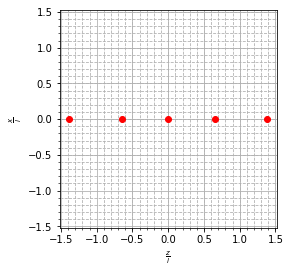

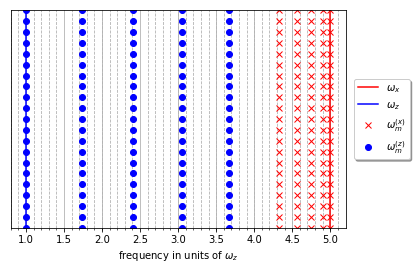

In [10]:
ionchain1 = ionchain.IonChain(5,[5,1])
print(ionchain1.n)
ionchain1.plot_equilibrium_position()
ionchain1.plot_frequencies()

In [ ]:
def Lamb_Dicke(ic, deltak, M):
    """Computes Lamb-Dicke parameters for a trapped ion chain 
    
    Args:
        ic (Object) - an instance of a trapped ion chain
        
    Returns:
        An nxn matrix where n is the number of ions in the ion chain.
        The i,mth entry of the matrix corresponds to the Lambe-Dicke
        parameter eta[i,m] which sets the scale for the coupling between
        spin i and mode m.
    """
    hbar = constants.value(u'Planck constant over 2 pi')
    n = ic.n
    b_ij = ic.x_eigvecs
    omega_m = ic.x_freqs
    eta = np.empty([n,n])
    for m in range(n):
        for i in range(n):
            eta[i,m] = b[i,m]*deltak*(hbar/(2*M*omega_m[m])**1/2)
    return eta

In [ ]:


def J_ij(mus, Rabi_freq_matrix,ic,deltak,M):
    """Computes spin-spin coupling beteen atoms in a trapped ion
    chain with multiple spectral beatnote detuning. 
    
    Args:
        mus(A 1Xn vector,where n is number of ions in chain) 
            - the mth entry is the beatnote detuning on ion m
        Rabi_freq_matrix(A nXn array) 
            - containing where the i,nth entry is the Rabi
            frequency of spectral component n at ion i
        ic (Object) - an instance of a trapped ion chain
        
    Returns:
        An nxn matrix where n is the number of ions in the ion chain.
        The i,jth is the spin-spin coupling beteen atoms i and j in the
        ion chain.
    """    
    n = ic.n
    omega_m = ic.x_freqs
    Rabi_matrix = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            Rabi_matrix[i,j] = sum(np.multiply(Rabi_freq_matrix[[i],:], Rabi_freq_matrix[[j],:]))[0]
    eta = Lamb_Dicke(ic, deltak,M)
    sum_matrix = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            numerators = np.multiply(np.multiply(eta[[i],:],eta[[j],:]),omega_m)
            denominators = np.multiply((mus,mus)-np.multiply(omega_m,omega_m))
            sum_matrix[i,j] = sum(np.divide(numerators,denominators))[0]
    return Rabi_matrix*sum_matrix 